# Лабораторная работа: Численные методы решения СЛАУ

**Задача:** № II.10.5 (вариант у) по Аристовой–Лобанову–Завьяловой.

Рассматривается СЛАУ $ Ax = f $, где:

- Размерность: $ n = 12 $;
- Матрица $A = (a_{ij})$ задаётся по формулам:
  - $a_{ii} = 1$,
  - $a_{ij} = \dfrac{1}{i^2 + j}, \quad i \ne j,$ (индексация с 1);
- Правая часть:
  - $f_i = \dfrac{1}{i}, \quad i = 1,\dots, n.$

Необходимо:
1. Реализовать методы решения СЛАУ:
   - Метод Гаусса с частичным выбором главного элемента;
   - Метод LU-разложения (если применим);
   - Итерационные методы:
     - Якоби,
     - Зейделя,
     - верхней релаксации (SOR),
     - градиентного спуска,
     - минимальных невязок,
     - сопряжённых градиентов,
     - стабилизированный метод бисопряжённых градиентов (BiCGStab).
2. Для итерационных методов построить графики убывания невязки $\|r_k\|_2 = \|f - Ax_k\|_2$ от номера итерации.
3. Найти оценки качества матрицы:
   - собственные значения $\lambda_{\min}, \lambda_{\max}$,
   - число обусловленности $\kappa_2(A)$.

Во всех итерационных методах критерием остановки будем считать:

\begin{equation*}
\|r_k\|_2 = \|f - A x_k\|_2 \le \varepsilon,
\end{equation*}
где $\varepsilon$ — заданная точность.


## Краткая теория

Рассматриваем СЛАУ:
\begin{equation*}
A x = f
\end{equation*}

- **Невязка:**

\begin{equation*}
r_k = f - A x_k
\end{equation*}

- **Ошибка:** 

\begin{equation*}
e_k = x_k - x_*,
\end{equation*}
где $x_*$ — точное решение.

- Связь: 

\begin{equation*}
A e_k = r_k,
\end{equation*}
откуда $\|e_k\| \le \|A^{-1}\| \, \|r_k\|$

**Число обусловленности** в 2-норме:

\begin{equation*}
\kappa_2(A) = \|A\|_2 \|A^{-1}\|_2 = \frac{\lambda_{\max}(A^T A)^{1/2}}{\lambda_{\min}(A^T A)^{1/2}}
\end{equation*}

### Итерационные методы

Разбиение:

\begin{equation*}
A = D - L - U,
\end{equation*}

где:
- \(D\) — диагональ,
- \(-L\) — нижнетреугольная часть,
- \(-U\) — верхнетреугольная часть.

**Метод Якоби:**
\begin{equation*}
x_i^{(k+1)} = \frac{1}{a_{ii}}\Big(f_i - \sum_{j\neq i} a_{ij} x_j^{(k)}\Big)
\end{equation*}

**Метод Зейделя:**
\begin{equation*}
x_i^{(k+1)} = \frac{1}{a_{ii}}\Big(f_i - \sum_{j<i} a_{ij} x_j^{(k+1)} - \sum_{j>i} a_{ij} x_j^{(k)}\Big)
\end{equation*}

**Метод верхней релаксации (SOR):**
\begin{equation*}
x_i^{(k+1)} = (1-\omega)x_i^{(k)} + \frac{\omega}{a_{ii}}\Big(
f_i - \sum_{j<i} a_{ij} x_j^{(k+1)} - \sum_{j>i} a_{ij} x_j^{(k)}
\Big)
\end{equation*}

### Методы градиентного типа

Рассматриваем функционал:
\begin{equation*}
\varphi(x) = \frac12 x^T A x - f^T x.
\end{equation*}

Для симметричной положительно определённой \(A\): \(\nabla \varphi(x) = A x - f = -r\)

**Градиентный спуск:**

\begin{equation*}
x_{k+1} = x_k + \alpha_k r_k, \quad 
\alpha_k = \frac{(r_k, r_k)}{(A r_k, r_k)}
\end{equation*}

**Метод минимальных невязок:**
\begin{equation*}
x_{k+1} = x_k + \alpha_k r_k, \quad
\alpha_k = \frac{(A r_k, r_k)}{(A r_k, A r_k)}
\end{equation*}

**Сопряжённые градиенты (для SPD):**

\begin{aligned}
& r_0 = f - A x_0,\quad p_0 = r_0, \\
& \alpha_k = \frac{(r_k,r_k)}{(A p_k, p_k)}, \\
& x_{k+1} = x_k + \alpha_k p_k, \\
& r_{k+1} = r_k - \alpha_k A p_k, \\
& \beta_{k+1} = \frac{(r_{k+1},r_{k+1})}{(r_k,r_k)}, \\
& p_{k+1} = r_{k+1} + \beta_{k+1} p_k.
\end{aligned}


**BiCGStab** — метод для общего (необязательно симметричного) \(A\), комбинирующий идеи BiCG и «стабилизации» для сглаживания невязки. В ноутбуке реализуем стандартный алгоритм из учебников.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Чтобы графики показывались прямо в ноутбуке
%matplotlib inline


In [ ]:
def build_system_variant_u(n=12):
    """
    Вариант у):
    n = 12, a_ii = 1, a_ij = 1/(i^2 + j), i != j, f_i = 1/i.
    Индексация в формуле по книге — с 1, в коде — с 0.
    """
    A = np.zeros((n, n), dtype=float)
    for i in range(n):
        for j in range(n):
            if i == j:
                A[i, j] = 1.0
            else:
                A[i, j] = 1.0 / ((i + 1) ** 2 + (j + 1))
    f = np.array([1.0 / (i + 1) for i in range(n)], dtype=float)
    return A, f

# Проверим размеры
A, b = build_system_variant_u()
A.shape, b.shape


((12, 12), (12,))

In [ ]:
def forward_substitution(L, b):
    """Решение L y = b (L — нижнетреугольная)"""
    n = len(b)
    y = np.zeros_like(b, dtype=float)
    for i in range(n):
        s = b[i]
        for j in range(i):
            s -= L[i, j] * y[j]
        y[i] = s / L[i, i]
    return y


def backward_substitution(U, y):
    """Решение U x = y (U — верхнетреугольная)"""
    n = len(y)
    x = np.zeros_like(y, dtype=float)
    for i in range(n - 1, -1, -1):
        s = y[i]
        for j in range(i + 1, n):
            s -= U[i, j] * x[j]
        x[i] = s / U[i, i]
    return x


def residual(A, x, b):
    """Невязка r = b - A x"""
    return b - A @ x


In [ ]:
def gaussian_elimination_partial_pivot(A, b):
    """
    Метод Гаусса с частичным выбором главного элемента.
    Возвращает решение x, не портя исходные A, b.
    """
    A = A.astype(float).copy()
    b = b.astype(float).copy()
    n = len(b)

    for k in range(n - 1):
        # поиск главного по модулю элемента в столбце k
        pivot_row = k + np.argmax(np.abs(A[k:, k]))
        if np.isclose(A[pivot_row, k], 0.0):
            raise ValueError("Матрица вырождена или близка к вырожденной")
        if pivot_row != k:
            A[[k, pivot_row], :] = A[[pivot_row, k], :]
            b[[k, pivot_row]] = b[[pivot_row, k]]

        # исключение
        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            A[i, k:] -= m * A[k, k:]
            b[i] -= m * b[k]

    # обратная подстановка
    x = backward_substitution(A, b)
    return x

# Тест: решаем нашу систему
x_gauss = gaussian_elimination_partial_pivot(A, b)
print("Решение методом Гаусса:\n", x_gauss)
print("||r||_2 =", np.linalg.norm(residual(A, x_gauss, b)))


Решение методом Гаусса:
 [0.75537042 0.23879963 0.17890325 0.15086988 0.13170938 0.1170332
 0.10527117 0.09560544 0.08752166 0.08066593 0.074783   0.06968322]
||r||_2 = 8.666675708199898e-17


In [ ]:
def lu_decomposition_partial_pivot(A):
    """
    LU-разложение с частичным выбором главного элемента.
    Возвращает P, L, U такие, что P @ A = L @ U.
    """
    A = A.astype(float).copy()
    n = A.shape[0]
    P = np.eye(n)
    L = np.zeros((n, n), dtype=float)
    U = A.copy()

    for k in range(n):
        # выбор главного элемента в столбце k
        pivot_row = k + np.argmax(np.abs(U[k:, k]))
        if np.isclose(U[pivot_row, k], 0.0):
            raise ValueError("Матрица вырождена или близка к вырожденной")
        if pivot_row != k:
            U[[k, pivot_row], :] = U[[pivot_row, k], :]
            P[[k, pivot_row], :] = P[[pivot_row, k], :]
            if k > 0:
                L[[k, pivot_row], :k] = L[[pivot_row, k], :k]

        L[k, k] = 1.0
        for i in range(k + 1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] -= L[i, k] * U[k, k:]

    return P, L, U


def lu_solve(P, L, U, b):
    Pb = P @ b
    y = forward_substitution(L, Pb)
    x = backward_substitution(U, y)
    return x

# Тест LU
P, L, U = lu_decomposition_partial_pivot(A)
x_lu = lu_solve(P, L, U, b)
print("Решение через LU:\n", x_lu)
print("||r||_2 =", np.linalg.norm(residual(A, x_lu, b)))


Решение через LU:
 [0.75537042 0.23879963 0.17890325 0.15086988 0.13170938 0.1170332
 0.10527117 0.09560544 0.08752166 0.08066593 0.074783   0.06968322]
||r||_2 = 8.666675708199898e-17


In [ ]:
def jacobi(A, b, x0=None, tol=1e-8, max_iter=1000):
    n = len(b)
    if x0 is None:
        x = np.zeros_like(b, dtype=float)
    else:
        x = x0.astype(float).copy()

    D = np.diag(A)
    if np.any(np.isclose(D, 0.0)):
        raise ValueError("Нулевой диагональный элемент, Якоби неприменим")

    R = A - np.diagflat(D)  # L + U
    residuals = []

    for k in range(max_iter):
        r = residual(A, x, b)
        res_norm = np.linalg.norm(r)
        residuals.append(res_norm)
        if res_norm < tol:
            break
        x = (b - R @ x) / D
    return x, residuals


def gauss_seidel(A, b, x0=None, tol=1e-8, max_iter=1000):
    n = len(b)
    if x0 is None:
        x = np.zeros_like(b, dtype=float)
    else:
        x = x0.astype(float).copy()

    residuals = []
    for k in range(max_iter):
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])         # новые значения
            s2 = np.dot(A[i, i+1:], x[i+1:])     # старые значения
            x[i] = (b[i] - s1 - s2) / A[i, i]

        r = residual(A, x, b)
        res_norm = np.linalg.norm(r)
        residuals.append(res_norm)
        if res_norm < tol:
            break
    return x, residuals


def sor(A, b, x0=None, tol=1e-8, max_iter=1000, omega=1.5):
    n = len(b)
    if x0 is None:
        x = np.zeros_like(b, dtype=float)
    else:
        x = x0.astype(float).copy()

    residuals = []
    for k in range(max_iter):
        for i in range(n):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x_new_i = (b[i] - s1 - s2) / A[i, i]
            x[i] = (1 - omega) * x[i] + omega * x_new_i

        r = residual(A, x, b)
        res_norm = np.linalg.norm(r)
        residuals.append(res_norm)
        if res_norm < tol:
            break
    return x, residuals


In [ ]:
def gradient_descent(A, b, x0=None, tol=1e-8, max_iter=1000):
    """
    Градиентный спуск для нормальных уравнений A^T A x = A^T b.
    Контролируем реальную невязку исходной системы ||A x - b||.
    """
    At = A.T
    B = At @ A
    g = At @ b

    if x0 is None:
        x = np.zeros(A.shape[1], dtype=float)
    else:
        x = x0.astype(float).copy()

    residuals = []
    for k in range(max_iter):
        r = g - B @ x           # невязка нормальных уравнений
        res_norm = np.linalg.norm(A @ x - b)
        residuals.append(res_norm)
        if res_norm < tol:
            break
        Br = B @ r
        alpha = (r @ r) / (r @ Br)
        x = x + alpha * r
    return x, residuals


def minimal_residual(A, b, x0=None, tol=1e-8, max_iter=1000):
    """
    Метод минимальных невязок для нормальных уравнений A^T A x = A^T b.
    """
    At = A.T
    B = At @ A
    g = At @ b

    if x0 is None:
        x = np.zeros(A.shape[1], dtype=float)
    else:
        x = x0.astype(float).copy()

    residuals = []
    for k in range(max_iter):
        r = g - B @ x
        Ar = B @ r
        res_norm = np.linalg.norm(A @ x - b)
        residuals.append(res_norm)
        if res_norm < tol:
            break
        alpha = (Ar @ r) / (Ar @ Ar)
        x = x + alpha * r
    return x, residuals


def conjugate_gradient(A, b, x0=None, tol=1e-8, max_iter=1000):
    """
    Сопряжённые градиенты применяем к SPD-матрице B = A^T A.
    """
    At = A.T
    B = At @ A
    g = At @ b

    n = A.shape[1]
    if x0 is None:
        x = np.zeros(n, dtype=float)
    else:
        x = x0.astype(float).copy()

    r = g - B @ x
    p = r.copy()
    residuals = []

    for k in range(max_iter):
        res_norm = np.linalg.norm(A @ x - b)
        residuals.append(res_norm)
        if res_norm < tol:
            break

        Bp = B @ p
        alpha = (r @ r) / (p @ Bp)
        x = x + alpha * p
        r_new = r - alpha * Bp
        beta = (r_new @ r_new) / (r @ r)
        p = r_new + beta * p
        r = r_new
    return x, residuals


In [ ]:
def bicgstab(A, b, x0=None, tol=1e-8, max_iter=1000):
    """
    BiCGStab для общего A.
    """
    n = len(b)
    if x0 is None:
        x = np.zeros(n, dtype=float)
    else:
        x = x0.astype(float).copy()

    r = b - A @ x
    r_hat = r.copy()
    rho_prev = alpha = omega = 1.0
    v = np.zeros_like(r)
    p = np.zeros_like(r)

    residuals = []

    for k in range(max_iter):
        res_norm = np.linalg.norm(r)
        residuals.append(res_norm)
        if res_norm < tol:
            break

        rho = r_hat @ r
        if np.isclose(rho, 0.0):
            break

        if k == 0:
            p = r.copy()
        else:
            beta = (rho / rho_prev) * (alpha / omega)
            p = r + beta * (p - omega * v)

        v = A @ p
        alpha = rho / (r_hat @ v)
        s = r - alpha * v
        if np.linalg.norm(s) < tol:
            x = x + alpha * p
            r = s
            residuals.append(np.linalg.norm(r))
            break

        t = A @ s
        omega = (t @ s) / (t @ t)
        x = x + alpha * p + omega * s
        r = s - omega * t

        rho_prev = rho
        if np.isclose(omega, 0.0):
            break

    return x, residuals


In [ ]:
def plot_residuals(histories, labels, title="Убывание невязки"):
    plt.figure(figsize=(12, 6))
    for res, label in zip(histories, labels):
        plt.semilogy(res, label=label)
    plt.xlabel("Итерация")
    plt.ylabel(r"$\|r_k\|_2$")
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.tight_layout()
    plt.show()


Размерность системы: n = 12

Решение методом Гаусса:
[0.75537042 0.23879963 0.17890325 0.15086988 0.13170938 0.1170332
 0.10527117 0.09560544 0.08752166 0.08066593 0.074783   0.06968322]
Невязка Гаусса ||r||_2 = 8.666675708199898e-17

Решение через LU-разложение:
[0.75537042 0.23879963 0.17890325 0.15086988 0.13170938 0.1170332
 0.10527117 0.09560544 0.08752166 0.08066593 0.074783   0.06968322]
Невязка LU ||r||_2 = 8.666675708199898e-17

Собственные значения (могут быть комплексные):
[1.51994139 0.73570163 0.90170068 0.94712065 0.96661445 1.00748712
 0.97689729 0.98302524 0.98698879 0.98971023 0.99314337 0.99166917]
lambda_min = 0.7357016342479964
lambda_max = 1.5199413915285482
Число обусловленности kappa_2(A) = 2.229370889484632

Итерационные методы: финальные невязки
Якоби:       7.516293593414381e-11
Зейдель:     9.427842011928724e-11
SOR (ω=1.2): 9.911072494166548e-11
Град.спуск:  7.372429447089664e-11
Мин.невязок: 6.309839598397172e-11
CG (AᵀA):    5.414467393191899e-11
BiCGStab:

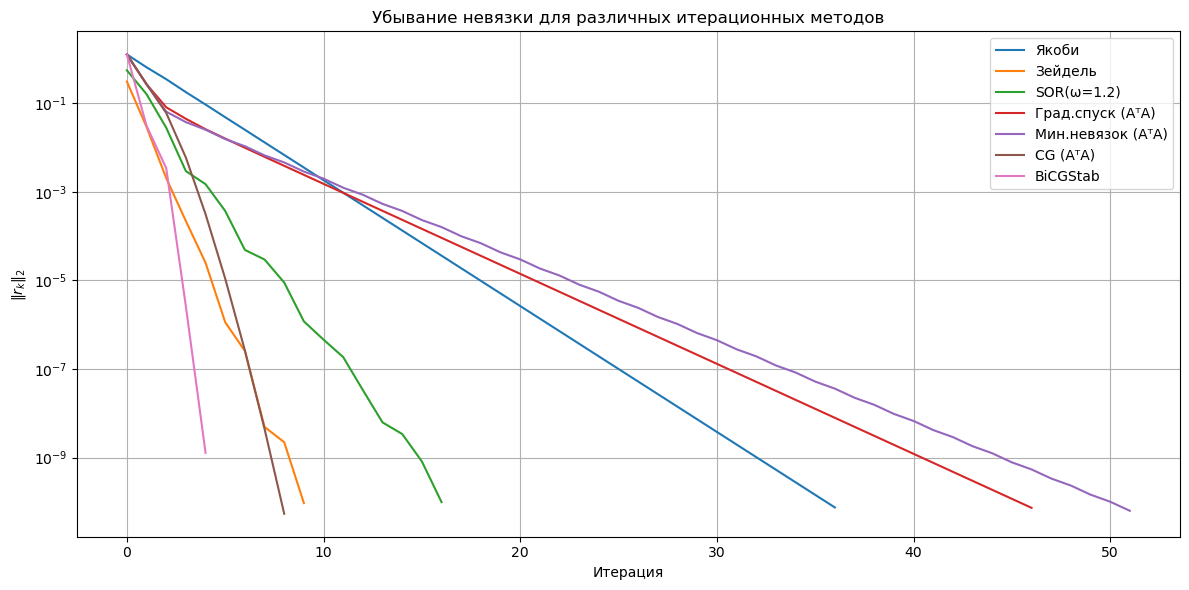

In [ ]:
def run_lab():
    # 1. Строим систему
    A, b = build_system_variant_u()
    n = A.shape[0]
    print(f"Размерность системы: n = {n}")

    # 2. Точное (условно) решение методом Гаусса
    x_gauss = gaussian_elimination_partial_pivot(A, b)
    r_gauss = residual(A, x_gauss, b)
    print("\nРешение методом Гаусса:")
    print(x_gauss)
    print("Невязка Гаусса ||r||_2 =", np.linalg.norm(r_gauss))

    # 3. LU-разложение
    P, L, U = lu_decomposition_partial_pivot(A)
    x_lu = lu_solve(P, L, U, b)
    r_lu = residual(A, x_lu, b)
    print("\nРешение через LU-разложение:")
    print(x_lu)
    print("Невязка LU ||r||_2 =", np.linalg.norm(r_lu))

    # 4. Собственные значения и число обусловленности
    eigvals = np.linalg.eigvals(A)
    lambda_min = np.min(eigvals)
    lambda_max = np.max(eigvals)
    cond2 = np.linalg.cond(A, 2)

    print("\nСобственные значения (могут быть комплексные):")
    print(eigvals)
    print(f"lambda_min = {lambda_min}")
    print(f"lambda_max = {lambda_max}")
    print(f"Число обусловленности kappa_2(A) = {cond2}")

    # 5. Итерационные методы
    x0 = np.zeros_like(b)
    tol = 1e-10
    max_iter = 5000

    x_jacobi, res_jacobi = jacobi             (A, b, x0=x0, tol=tol, max_iter=max_iter)
    x_gs,     res_gs     = gauss_seidel       (A, b, x0=x0, tol=tol, max_iter=max_iter)
    x_sor,    res_sor    = sor                (A, b, x0=x0, tol=tol, max_iter=max_iter, omega=1.2)
    x_gd,     res_gd     = gradient_descent   (A, b, x0=x0, tol=tol, max_iter=max_iter)
    x_mr,     res_mr     = minimal_residual   (A, b, x0=x0, tol=tol, max_iter=max_iter)
    x_cg,     res_cg     = conjugate_gradient (A, b, x0=x0, tol=tol, max_iter=max_iter)
    x_bi,     res_bi     = bicgstab           (A, b, x0=x0, tol=tol, max_iter=max_iter)

    print("\nИтерационные методы: финальные невязки")
    print("Якоби:      ", res_jacobi[-1])
    print("Зейдель:    ", res_gs[-1])
    print("SOR (ω=1.2):", res_sor[-1])
    print("Град.спуск: ", res_gd[-1])
    print("Мин.невязок:", res_mr[-1])
    print("CG (AᵀA):   ", res_cg[-1])
    print("BiCGStab:   ", res_bi[-1])

    # 6. График убывания невязки
    histories = [res_jacobi, res_gs, res_sor, res_gd, res_mr, res_cg, res_bi]
    labels = ["Якоби", "Зейдель", "SOR(ω=1.2)",
              "Град.спуск (AᵀA)", "Мин.невязок (AᵀA)",
              "CG (AᵀA)", "BiCGStab"]

    plot_residuals(histories, labels,
                   title="Убывание невязки для различных итерационных методов")

# Запуск
run_lab()
